# <b>boxplot<b>

This section describes various options available for boxplots in **fivecentplots**

See the full API https://endangeredoxen.github.io/fivecentplots/0.5.0/api/boxplot.html#boxplot

## Setup

Import packages:

In [1]:
import fivecentplots as fcp
import pandas as pd
from pathlib import Path

Read some fake boxplot data with no real meaning:

In [2]:
df = pd.read_csv(Path(fcp.__file__).parent / 'tests/fake_data_box.csv')
df.head()

,Batch,Sample,Region,Value,ID
0,101,1,Alpha123,3.5,ID701223A
1,101,1,Alpha123,0.0,ID7700-1222B
2,101,1,Alpha123,3.3,ID701223A
3,101,1,Alpha123,3.2,ID7700-1222B
4,101,1,Alpha123,4.0,ID701223A


Optionally set the design theme (skipping here and using default):

In [3]:
#fcp.set_theme('gray')
#fcp.set_theme('white')

## Groups

One of the most powerful features of JMP is its variability chart, which partitions data into separate boxplots based on one or more grouping criteria.  <b>fivecentplots</b> achieves this characteristic via the keyword `groups`.  The value of this keyword is one or more column names from the `DataFrame` that differentiate the `y` values being plotted.

### Single group

Using our fake dataset, we first plot our data grouped by a single column named "Batch".  Because our dataset has 3 unique values in the "Batch" column, we get three boxplots, each with a descriptive label.

In [4]:
df.Batch.unique()

array([101, 106, 103])

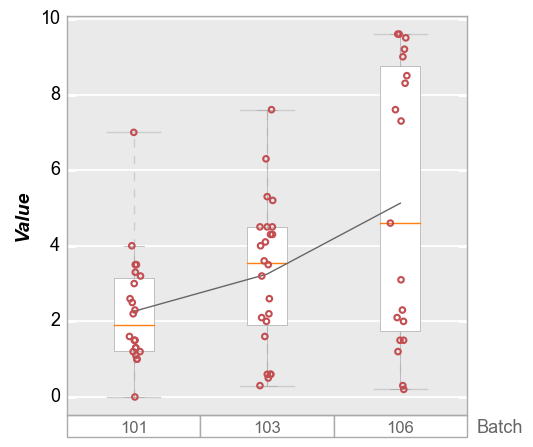

In [5]:
fcp.boxplot(df, y='Value', groups='Batch')

### Multiple groups

We can dive deeper into the dataset by specifying a list of column names for `groups`.  In this example we use columns "Batch" and "Sample" for which there are 7 unique groups.  Notice that the order of the values passed to `groups` determines the grouping hierarchy, with the first grouping column values on the bottom of the plot.

<div class="admonition note">
<p class="admonition-title"></p>
<p>Note that for purposes of the boxplot API, the values in the white rectangles under the plotting area are styled via keywords prefixed with `box_group_label`, while the column name strings are styled via keywords prefixed with `box_group_title`.</p>
</div>

In [6]:
df[['Batch', 'Sample']].drop_duplicates()

,Batch,Sample
0,101,1
10,101,2
22,106,1
31,106,2
41,103,1
50,103,2
60,103,3


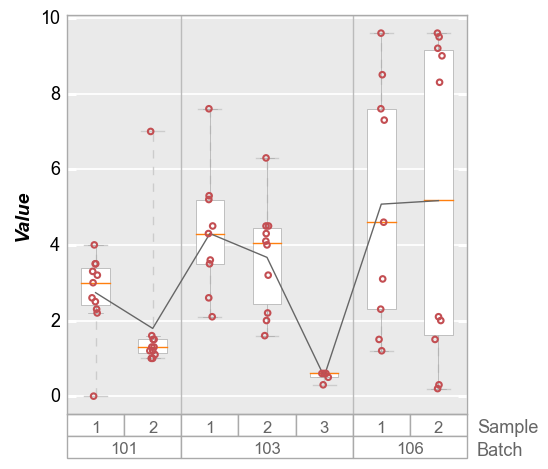

In [7]:
fcp.boxplot(df, y='Value', groups=['Batch', 'Sample'])

By default, the group values are sorted alphanumerically.  To preserve the order of the input DataFrame, add the keyword `sort=False`:

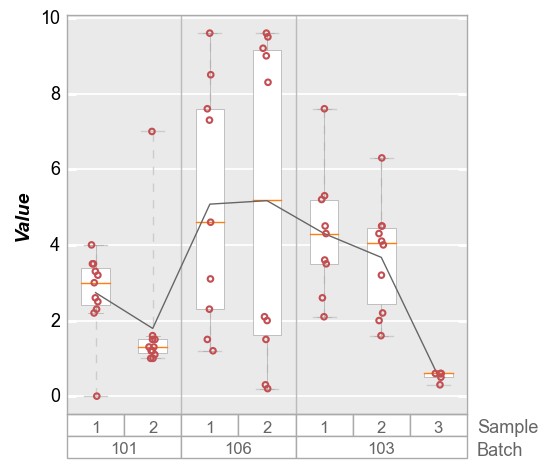

In [8]:
fcp.boxplot(df, y='Value', groups=['Batch', 'Sample'], sort=False)

### No groups

If not `groups` are specified, no grouping labels are added to the boxplot.

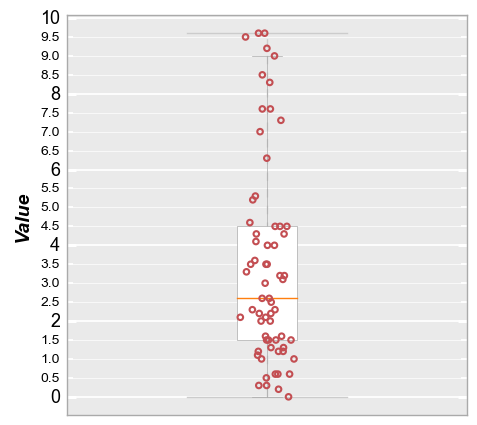

In [9]:
fcp.boxplot(df, y='Value', tick_labels_minor=True, grid_minor=True)

## Box elements

Several descriptive elements are available within the boxplot to better visualize the dataset.  These features are illustrated below.

### Dividers

By default, when multiple `groups` are specified gray divider lines are drawn between the bottom-level groups.  

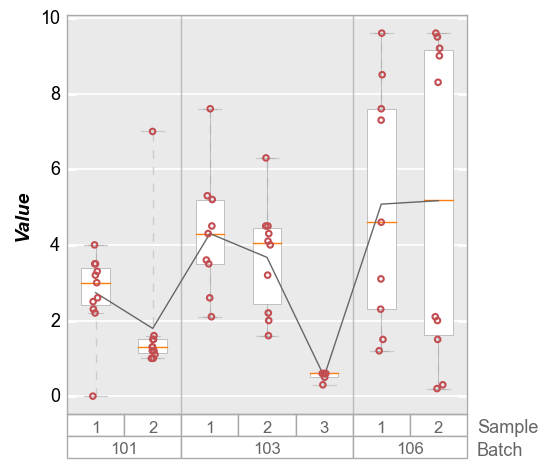

In [10]:
fcp.boxplot(df, y='Value', groups=['Batch', 'Sample'])

These divider lines can be disabled or styled using the appropriate keywords.

Disabled:

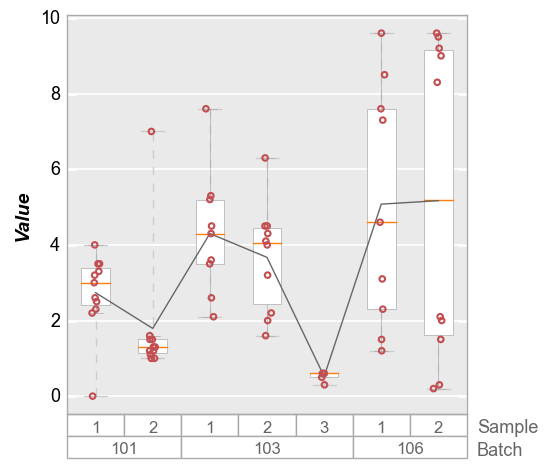

In [11]:
fcp.boxplot(df, y='Value', groups=['Batch', 'Sample'], box_divider=False)

Styled:

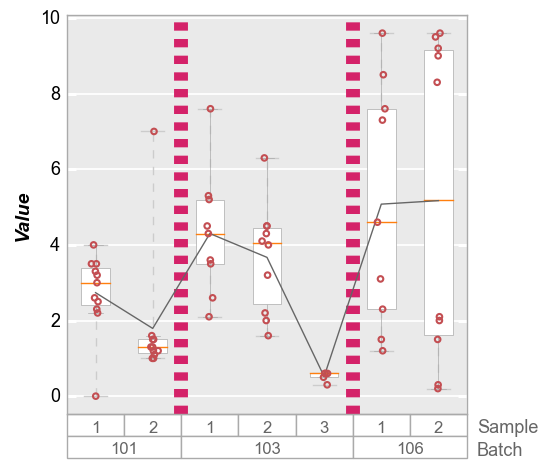

In [12]:
fcp.boxplot(df, y='Value', groups=['Batch', 'Sample'], 
            box_divider_color='#d42269', box_divider_width=10, box_divider_style='--')

### Whiskers

The "whiskers" on a boxplot span from Q1 to the minimum value on the lower end and Q3 to the maximum on the upper end, excluding outliers.  Outliers are defined as any points that are below (Q1 - 1.5 * IQR) on the lower end and above Q3 to (Q3 + 1.5 * IQR) on the upper end.  In the example below, notice that the first and second boxes each have an outlier point outside of the blue whisker lines.  Whisker lines can be styled using the keywords prefixed by `box_whisker`.  Note the horizontal "cap" at the end of the whisker lines shares the same style as the whiskers themselves. Default behavior is a solid gray line 0.5 pixel in width.

<div class="admonition note">
<p class="admonition-title"></p>
<p>The dashed lines that span to the outlier points are controlled by `box_range_lines` described in the next section.</p>
</div>

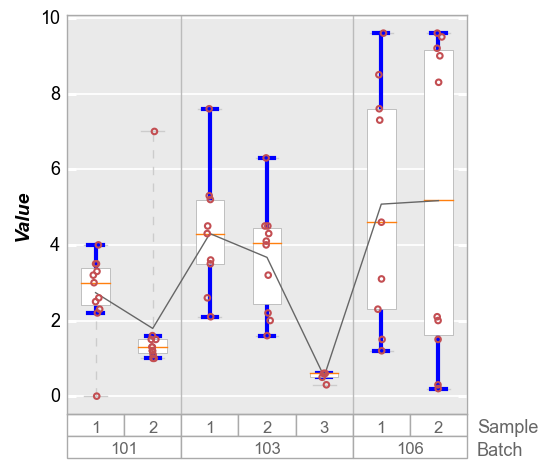

In [13]:
fcp.boxplot(df=df, y='Value', groups=['Batch', 'Sample'],
            box_whisker_color='#0000FF', box_whisker_width=3)

Whiskers can be disabled (be careful with the lack of plurality in the prefix!) but beware that if the range lines are still enabled you will see similar lines and horizontal caps.

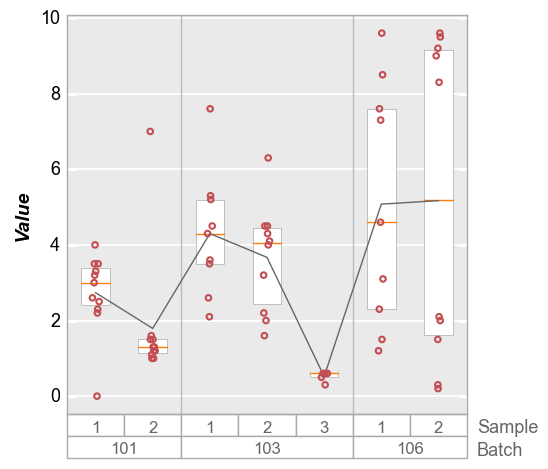

In [14]:
fcp.boxplot(df, y='Value', groups=['Batch', 'Sample'], box_whisker=False, box_range_lines=False)

### Range lines

Outlier points by definition fall outside of the box whiskers, but with range lines we can span the entire range of the data (from absolute minimum to absolute maximum).  This is particularly useful to indicate when there are outlier data points that fall outside of the limits of the visible y-axis.  These range lines are enabled by default but can be disabled or styled through keywords with the prefix `box_range_lines`.

Default behavior is a dashed gray line 0.5 pixel in width:

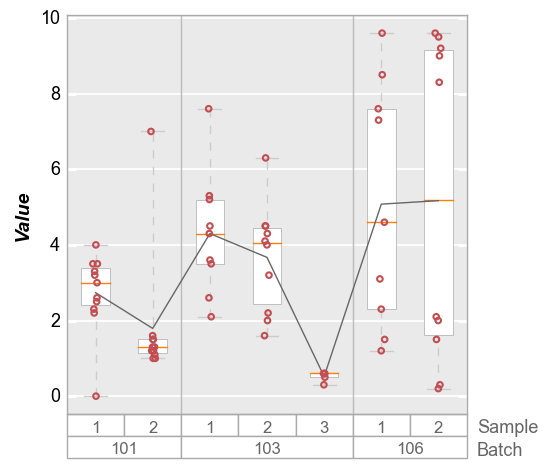

In [15]:
fcp.boxplot(df, y='Value', groups=['Batch', 'Sample'], box_whisker=False)

If we disable range lines and leave whiskers enabled we get this:

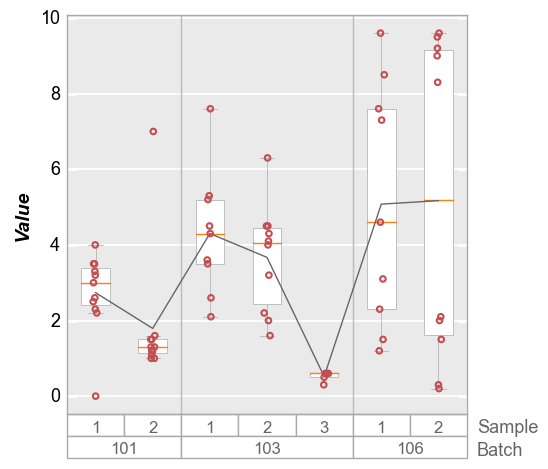

In [16]:
fcp.boxplot(df, y='Value', groups=['Batch', 'Sample'], box_range_lines=False)

Styled:

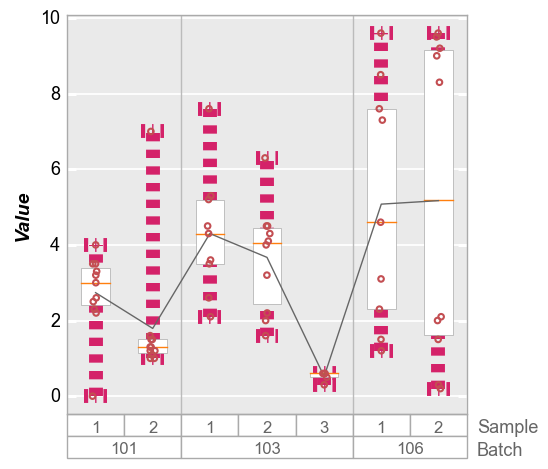

In [17]:
fcp.boxplot(df, y='Value', groups=['Batch', 'Sample'], box_whisker=False,
            box_range_lines_color='#d42269', box_range_lines_width=10, box_range_lines_style='-.')

### Markers

Comment on box_ prefix

#### Jitter

To improve visibility of the actual data points in the boxplots, <b>fivecentplots</b> automatically jitters the data points (i.e., adds some random noise along the x-axis).  This can be disabled using the keyword `jitter`.

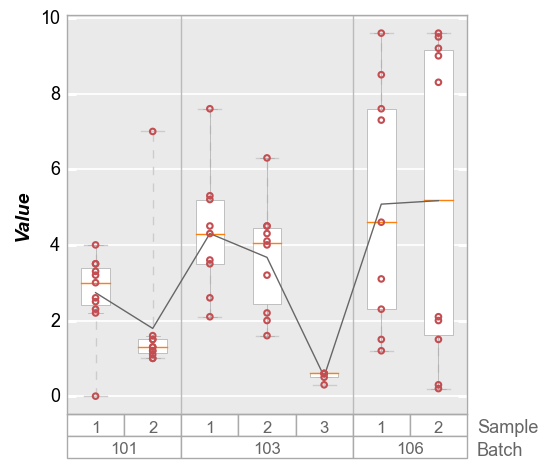

In [18]:
fcp.boxplot(df, y='Value', groups=['Batch', 'Sample'], jitter=False)

## More grouping

### Legend

Boxplots also support legending for another level of data visualization:

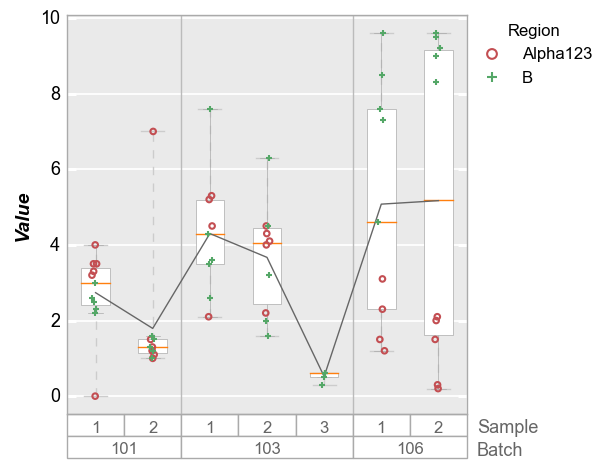

In [19]:
fcp.boxplot(df, y='Value', groups=['Batch', 'Sample'], legend='Region')

Note:  if there are a lot of legend items, the position of the legend will be automatically adjusted to avoid rendering over the box group titles.

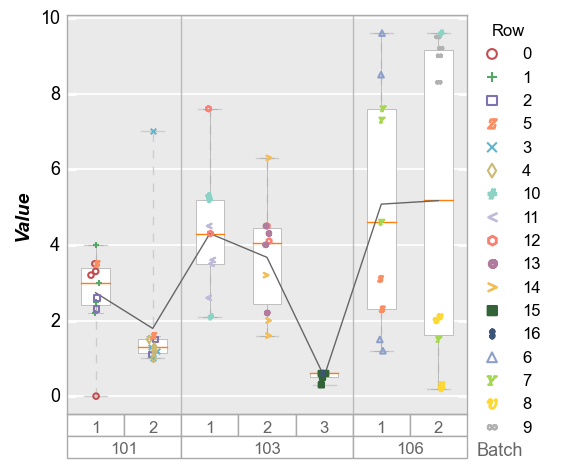

In [20]:
df['Row'] = [int(f) for f in df.index / 4]
fcp.boxplot(df, y='Value', groups=['Batch', 'Sample'], legend='Row')

### Column plots

boxplots can also be broken into subplots based on "row" and/or "col" values or "wrap" keywords.  In each case, a column name in the `DataFrame` is supplied as the keyword value.

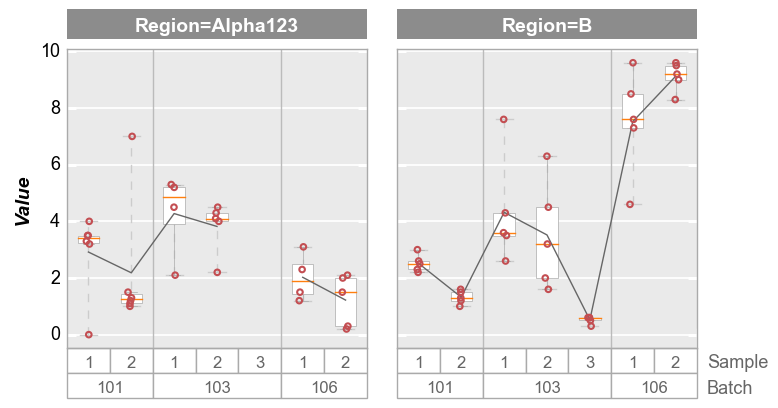

In [21]:
fcp.boxplot(df, y='Value', groups=['Batch', 'Sample'], col='Region', ax_size=[300, 300])

### Row plots

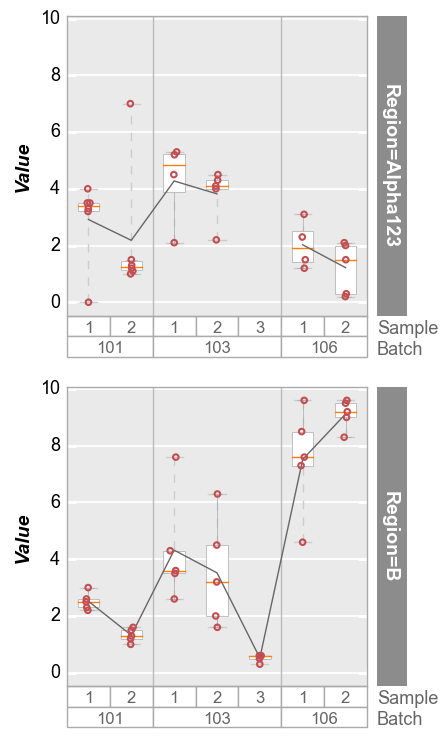

In [22]:
fcp.boxplot(df, y='Value', groups=['Batch', 'Sample'], row='Region', ax_size=[300, 300])

### Wrap plots

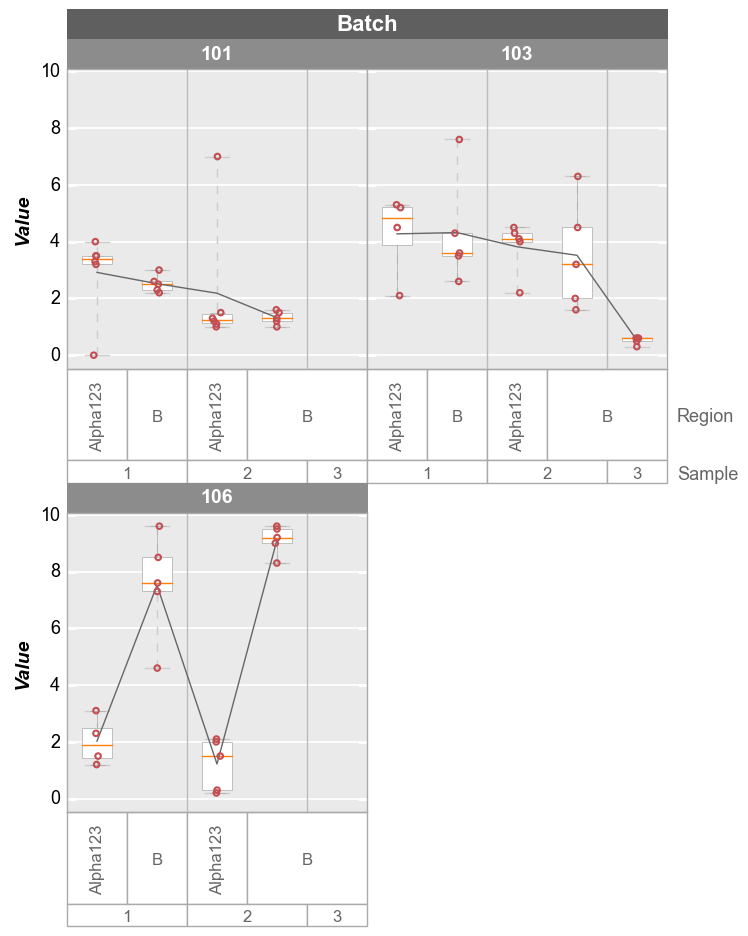

In [23]:
fcp.boxplot(df, y='Value', groups=['Sample', 'Region'], wrap='Batch', ax_size=[300, 300])

Alternatively, we can wrap multiple `y` column values and create a unique subplot for each column:

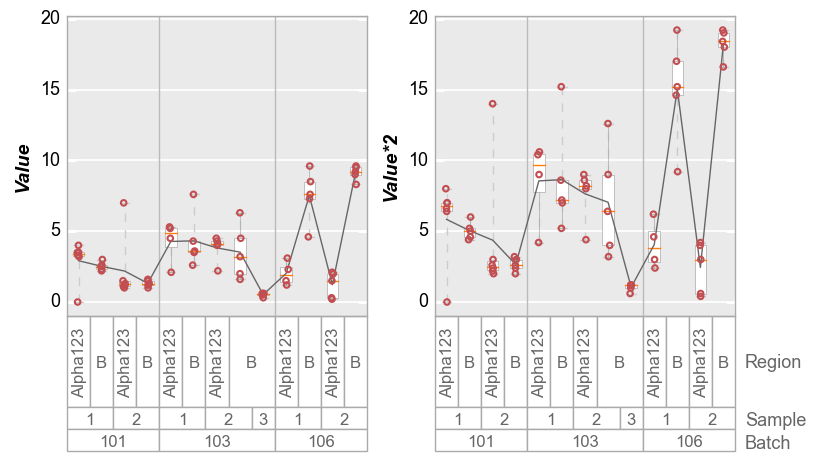

In [24]:
# Make a new y column
df['Value*2'] = 2*df['Value']

# Plot
fcp.boxplot(df, y=['Value', 'Value*2'], groups=['Batch', 'Sample', 'Region'], wrap='y', 
            ax_size=[300, 300])

Or if we disable y-axis range sharing:

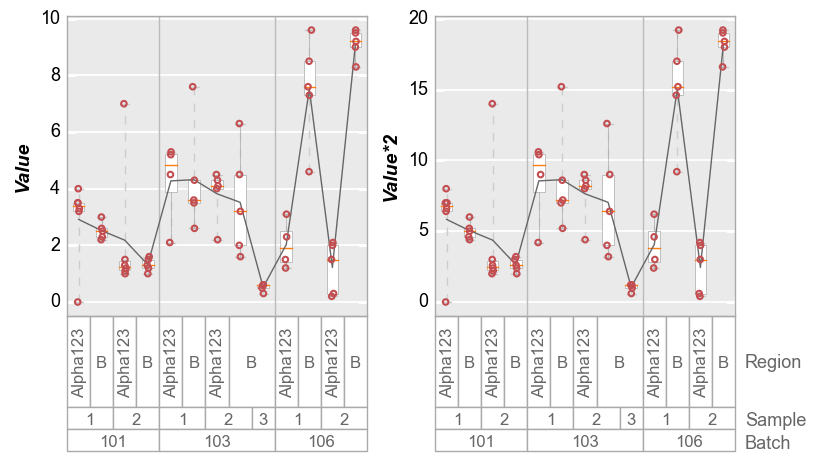

In [25]:
fcp.boxplot(df, y=['Value', 'Value*2'], groups=['Batch', 'Sample', 'Region'], wrap='y', 
            ax_size=[300, 300], share_y=False)

## Stats

### Grand Mean/Median

The "grand mean" or "grand median" is the mean/median value for the entire data set in a given plot window.  By default, the "grand mean" line is a dashed gray line and the "grand median" is a dashed blue line.  Individual line color, styles, and widths can be controlled via the typically-named keywords prefixed by `box_grand_mean` or `box_grand_median`.

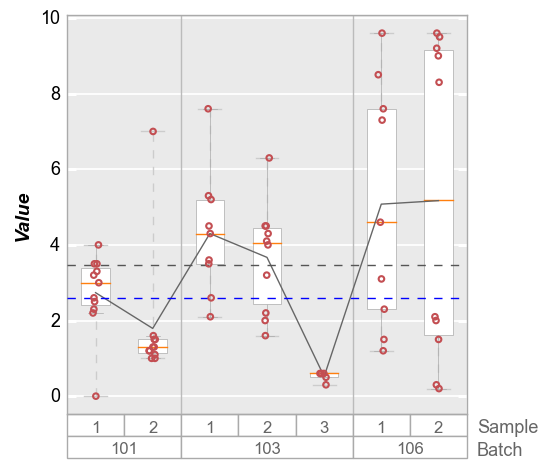

In [26]:
fcp.boxplot(df, y='Value', groups=['Batch', 'Sample'], grand_mean=True, grand_median=True)

 Both long form and short form keywords are available: i.e., `box_grand_mean_ATTRIBUTE` or `grand_mean_ATTRIBUTE`

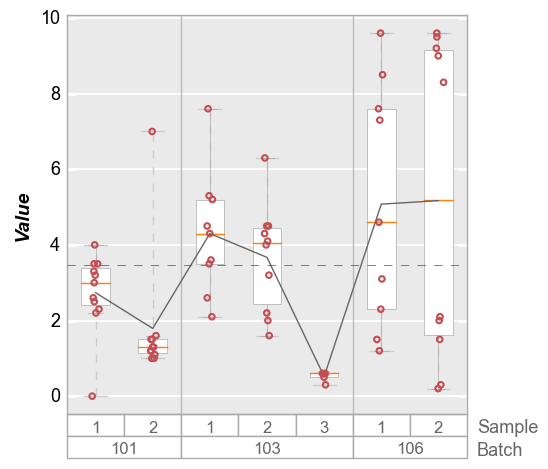

In [27]:
fcp.boxplot(df, y='Value', groups=['Batch', 'Sample'], grand_mean=True, 
            grand_mean_style=':', grand_mean_color='#FF0000', box_grand_mean_width=0.5)

### Group Means

Group means that correspond to the first level of grouping (i.e., same as the vertical divider lines).  By default, the mean values are depicted with horizontal dashed magenta lines.  Style are controlled by ``box_group_means_ATTRIBUTE`` or ``group_means_ATTRIBUTE``.

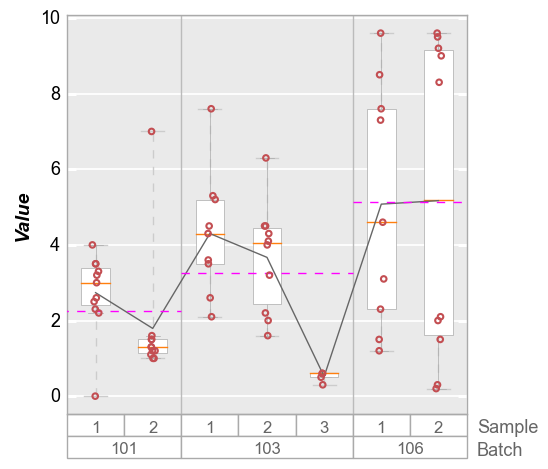

In [28]:
fcp.boxplot(df, y='Value', groups=['Batch', 'Sample'], group_means=True)

### Mean Diamonds

The ``box_mean_diamonds`` or ``mean_diamonds`` keyword allows you to overlay a diamond on the box which shows vertically the span of the data for a given confidence interval (default = 95%) and a horizontal line for the mean value of each group.  Using default parameters the diamonds are green (like the program that inspired them :) )

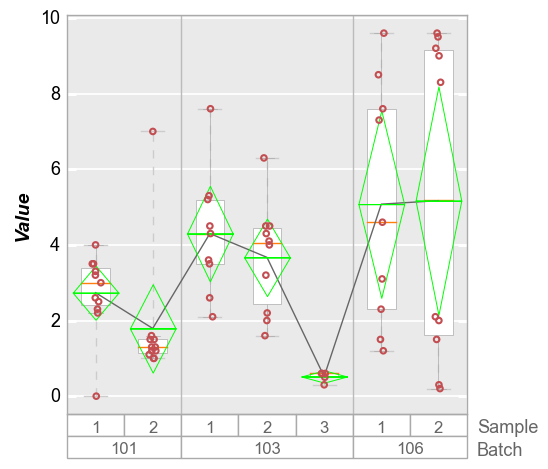

In [29]:
fcp.boxplot(df, y='Value', groups=['Batch', 'Sample'], mean_diamonds=True, conf_coeff=0.95)

### Stat line

In addition to displaying boxes with a median line and interquartile ranges, a connecting line can be drawn between boxes at some statistical value.  By default, the line connects the mean value of the distribution for each box, but other `DataFrame` stat values can be selected.  The stat line accepts the typical styling keywords of any line object with the prefix `box_stat_line` (i.e., `box_stat_line_color` or `box_stat_line_width`)

#### Mean

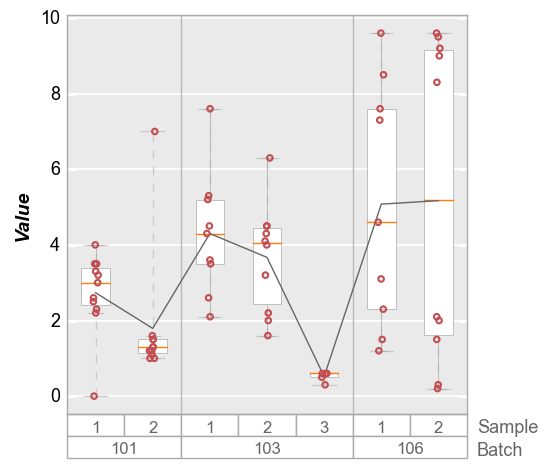

In [30]:
fcp.boxplot(df, y='Value', groups=['Batch', 'Sample'], box_stat_line='mean')

#### Median

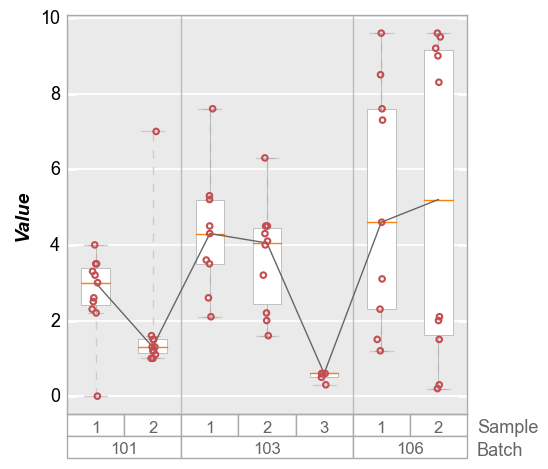

In [31]:
fcp.boxplot(df, y='Value', groups=['Batch', 'Sample'], box_stat_line='median')

#### Std dev

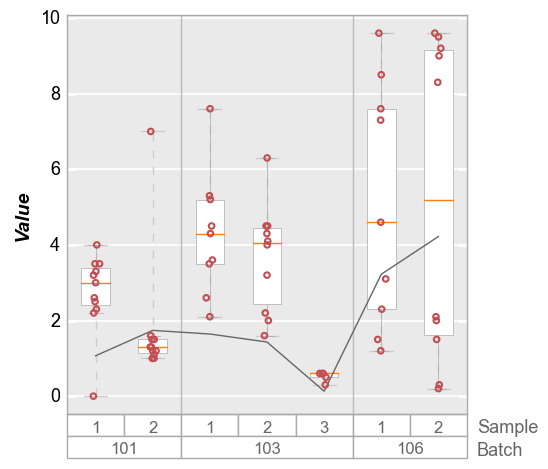

In [32]:
fcp.boxplot(df, y='Value', groups=['Batch', 'Sample'], box_stat_line='std')

#### Quantile

To define a quantile, use the convention "q{number between 0-100}":

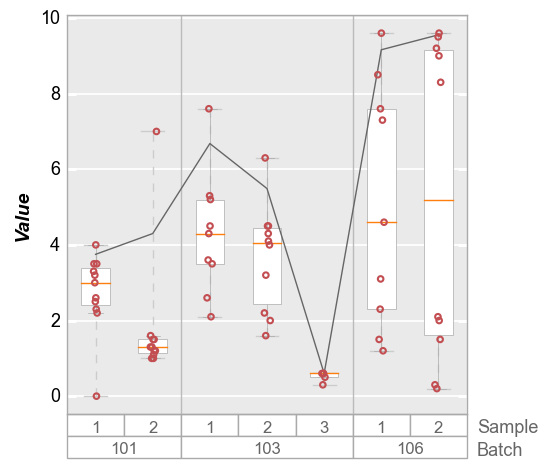

In [33]:
fcp.boxplot(df, y='Value', groups=['Batch', 'Sample'], box_stat_line='q95')

## Violins

We can also plot distributions with violin plots that show kernal density estimates of the data.  By default, these violin plots also contain a small boxes with whiskers to indicate Q1, Q3, 1.5 * IQR, and the median of the distribution (the white point).  Discrete data points are disabled by default but can be turned on with the keyword `violin_markers=True` (default box style shamelessly appropriated from `seaborn`).

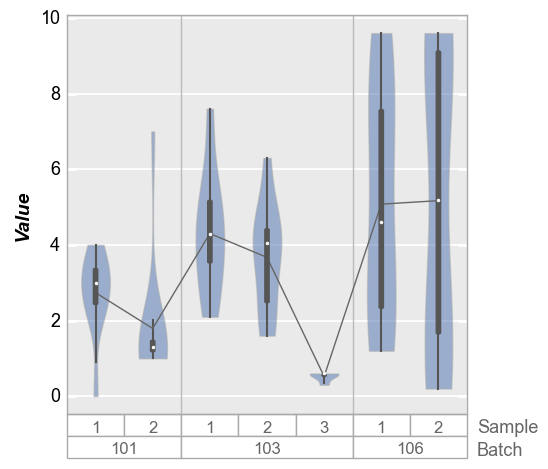

In [34]:
fcp.boxplot(df, y='Value', groups=['Batch', 'Sample'], violin=True)

We can change the style of the violin density profiles <i>and</i> the associated boxplot using keywords starting with `violin`. Note that the standard box styling attributes are ignored when adding the violin plot.  The reason for this is to make it possilbe to maintain different default settings for regular box plots and violin plots in the same theme file.

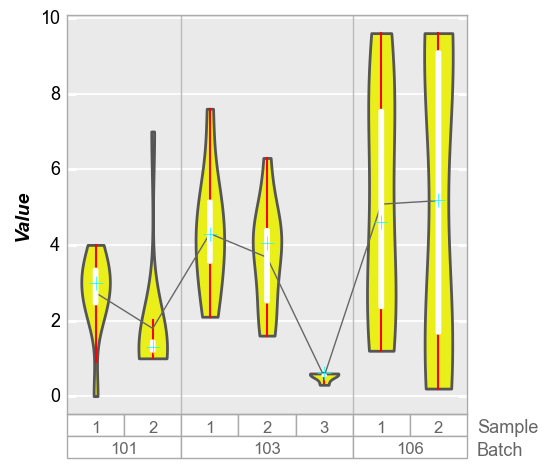

In [35]:
fcp.boxplot(df, y='Value', groups=['Batch', 'Sample'], violin=True, 
            violin_fill_color='#eaef1a', violin_fill_alpha=1, violin_edge_color='#555555', violin_edge_width=2,
            violin_box_color='#ffffff', violin_whisker_color='#ff0000', 
            violin_median_marker='+', violin_median_color='#00ffff', violin_median_size=10)

We can also disable the box overlay on the violin plot as follows:

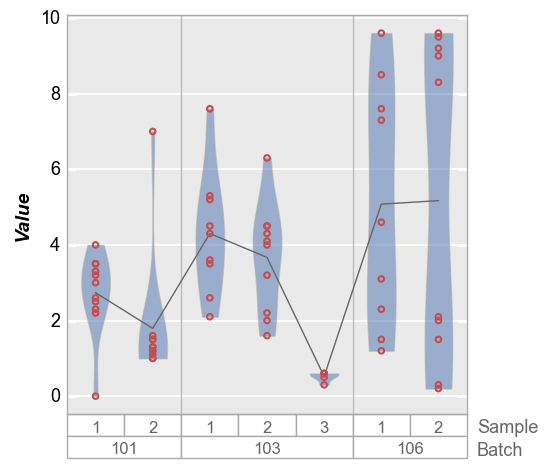

In [36]:
fcp.boxplot(df, y='Value', groups=['Batch', 'Sample'], violin=True, violin_box_on=False, violin_markers=True, jitter=False)

## Notch

Notch-style boxes can also be created using the `notch` keyword:

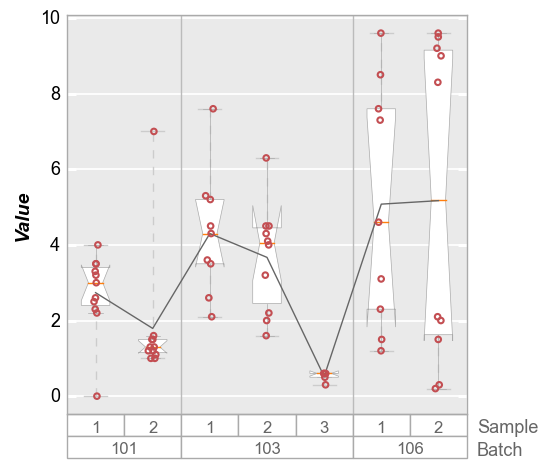

In [37]:
fcp.boxplot(df, y='Value', groups=['Batch', 'Sample'], notch=True)